# Задание лабораторной работы

- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - устранение пропусков в данных;
  - кодирование категориальных признаков;
  - нормализация числовых признаков.

# Выполнение работы

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

## Подключение Google Диска для работы с Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Чтение данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv', encoding='unicode_escape')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.shape

(8807, 12)

## Устранение пропусков

Определим столбцы, в которых наблюдаются пропуски данных:



In [ ]:
for column in data.columns:
    if (data[column].isnull().sum() != 0):
        print(column,':',data[column].isnull().sum())

director : 2634
cast : 825
country : 831
date_added : 10
rating : 4
duration : 3


Удалим пропуски в `director`:

In [ ]:
data.drop(data[data['director'].isnull()].index, inplace=True)

Проверим снова:

In [ ]:
for column in data.columns:
    if (data[column].isnull().sum() != 0):
        print(column,':',data[column].isnull().sum())

cast : 473
country : 422
rating : 1
duration : 3


Удалим еще строки с пропусками:

In [ ]:
data.drop(data[data['cast'].isnull()].index, inplace=True)
data.drop(data[data['country'].isnull()].index, inplace=True)
data.drop(data[data['rating'].isnull()].index, inplace=True)
data.drop(data[data['duration'].isnull()].index, inplace=True)


Убедимся с помощью процентного соотношения, что пропусков в столбцах нет:

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

show_id - 0%
type - 0%
title - 0%
director - 0%
cast - 0%
country - 0%
date_added - 0%
release_year - 0%
rating - 0%
duration - 0%
listed_in - 0%
description - 0%


## Кодирование категориальных признаков

### LabelEncoder

Выберем два категориальных признака - `type` и `director`. Их закодируем с помощью LabelEncoder.

In [ ]:
data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data.director.unique()

array(['Haile Gerima', 'Andy Devonshire', 'Theodore Melfi', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

Закодируем их в числовые значения:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
letype = LabelEncoder()
learrtype = letype.fit_transform(data["type"])
data["type"] = learrtype
data = data.astype({"type":"int64"})

In [ ]:
lepriv = LabelEncoder()
learrpriv = lepriv.fit_transform(data["director"])
data["director"] = learrpriv
data = data.astype({"director":"int64"})

In [ ]:
data.type.unique()

array([0, 1])

In [ ]:
data.director.unique()

array([1309,  256, 3619, ..., 2201, 2817, 2537])

### OneHotEncoder

Для признака `rating` проведем кодирование бинарными значениями с помощью OneHotEncoder.

In [ ]:
data.rating.unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['rating']])
cat_enc_ohe

<5332x14 sparse matrix of type '<class 'numpy.float64'>'
	with 5332 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
pd.get_dummies(data[['rating']]).head()

,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
7,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,True,False,False,False,False,False
24,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
pd.get_dummies(data[['rating']], dummy_na=True).head()

,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,rating_nan
7,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
24,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


### CountEncoder

Для кодирования `country` используем CountEncoder.

In [ ]:
data.country.unique()

array(['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'United States', 'Germany, Czech Republic',
       'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany', 'France',
       'United Kingdom, Canada, United States',
  

In [ ]:
!pip install category_encoders
from category_encoders.count import CountEncoder as ce_CountEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 853.4 kB/s eta 0:00:00


In [ ]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data['country'])

In [ ]:
data_COUNT_ENC.country.unique()

array([   1,  183, 1846,  875,    3,   83,   88,   59,   52,   12,    4,
          6,    8,    2,   13,  107,   49,   16,   73,    5,   35,   91,
         64,   23,   29,    7,   19,   10,   41,   76,   90,   48,    9,
         46,   74,   79,   14,   24,   11,   15])

### FrequencyEncoder

Для признака `type` используем FrequencyEncoder.

In [ ]:
data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data['type'])

In [ ]:
data_FREQ_ENC.type.unique()

array([0.69615079, 0.30384921])

## Нормализация числовых признаков

Нормализация числового признака предполагает что на основе существующего признака мы создаем новый признак, который в идеале имеет нормальное распределение.

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

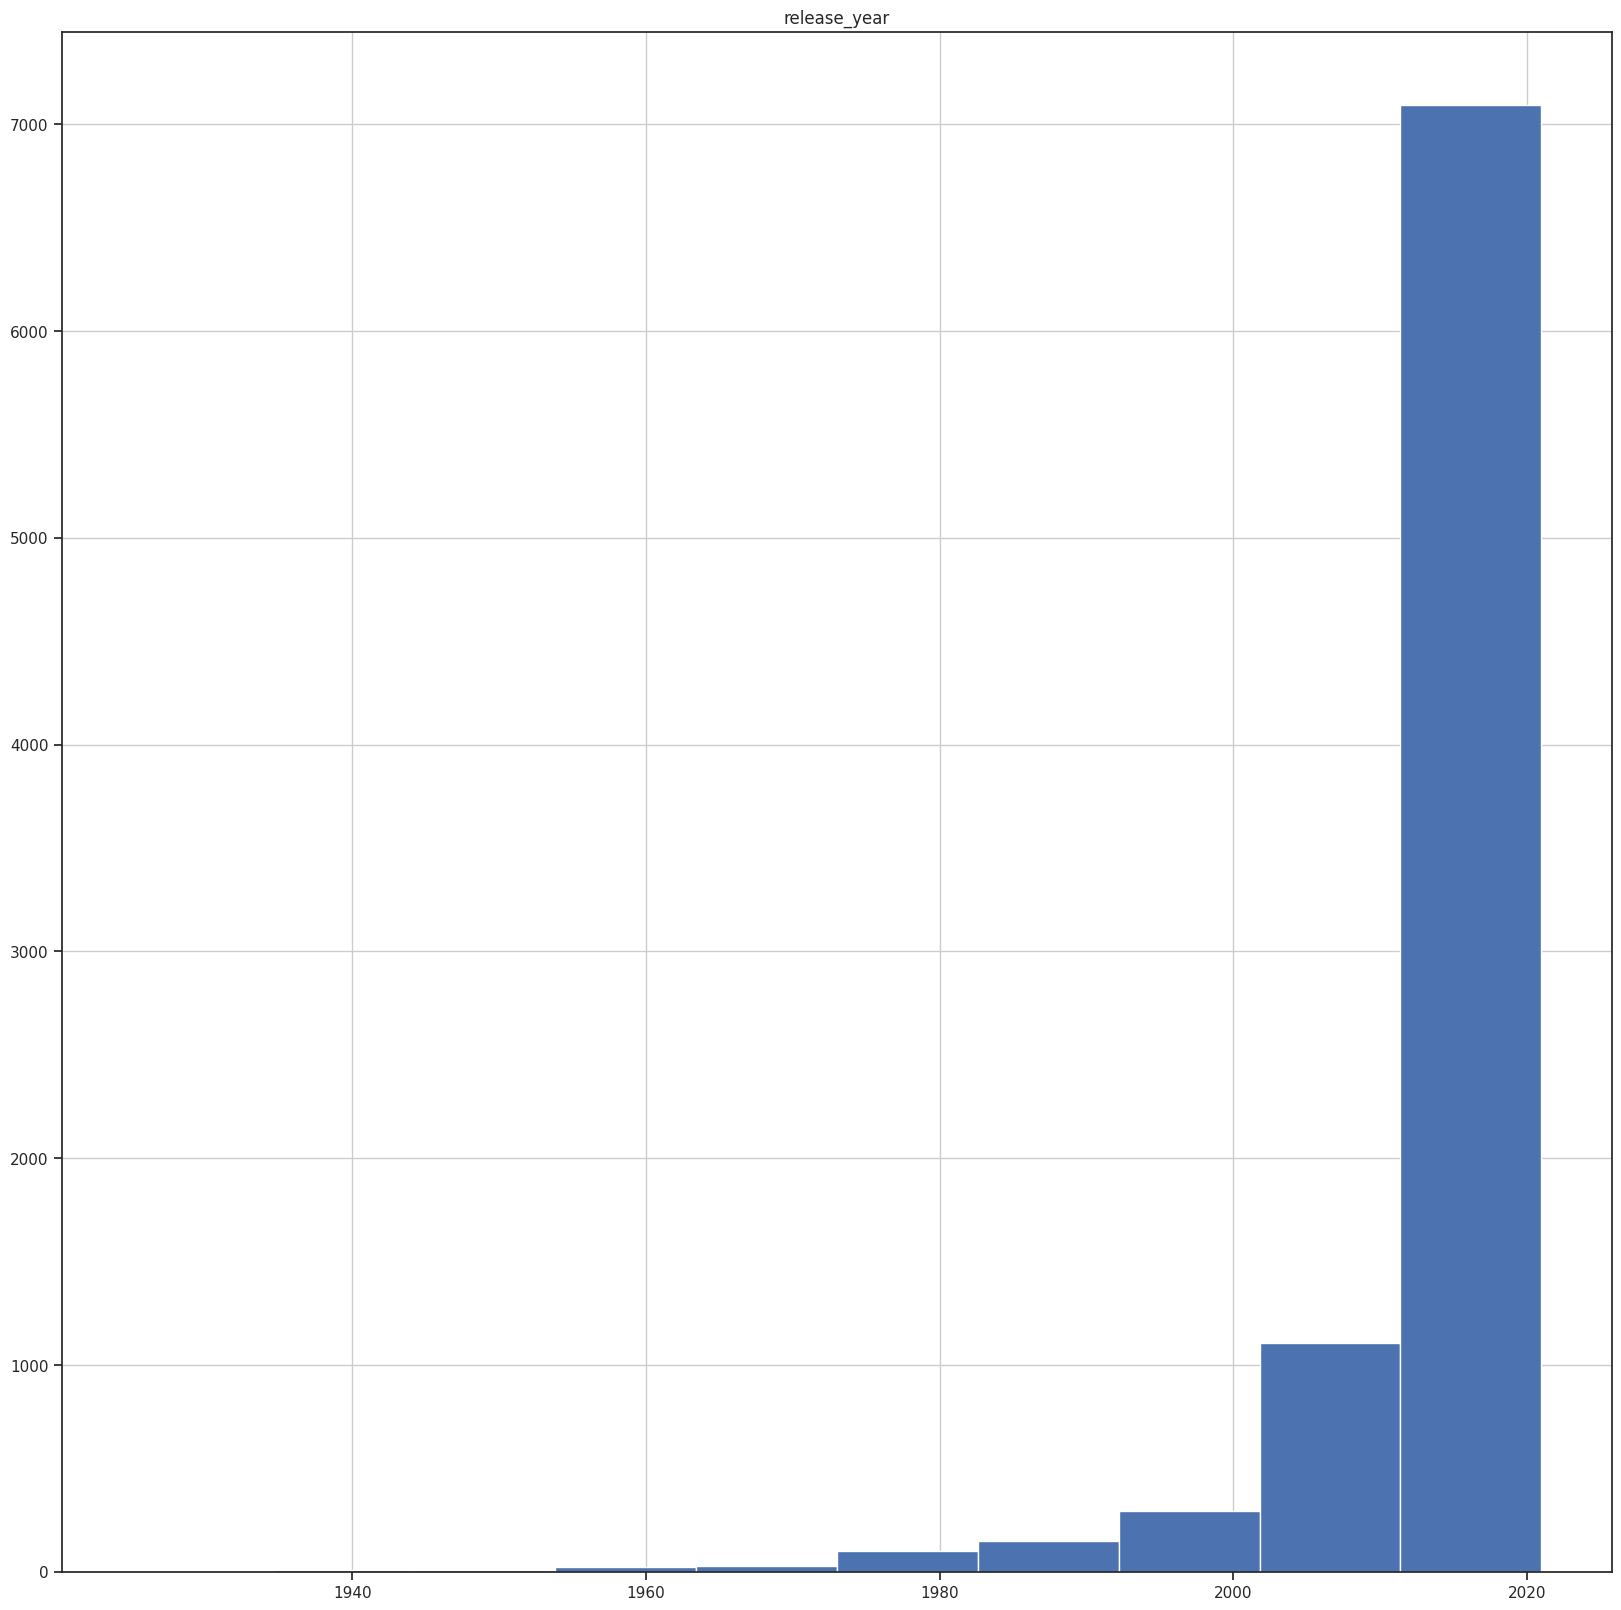

In [ ]:
data.hist(figsize=(20,20))
plt.show()

### Исходное распределение

Исходное распределение для признака числового признака `enginePower`:

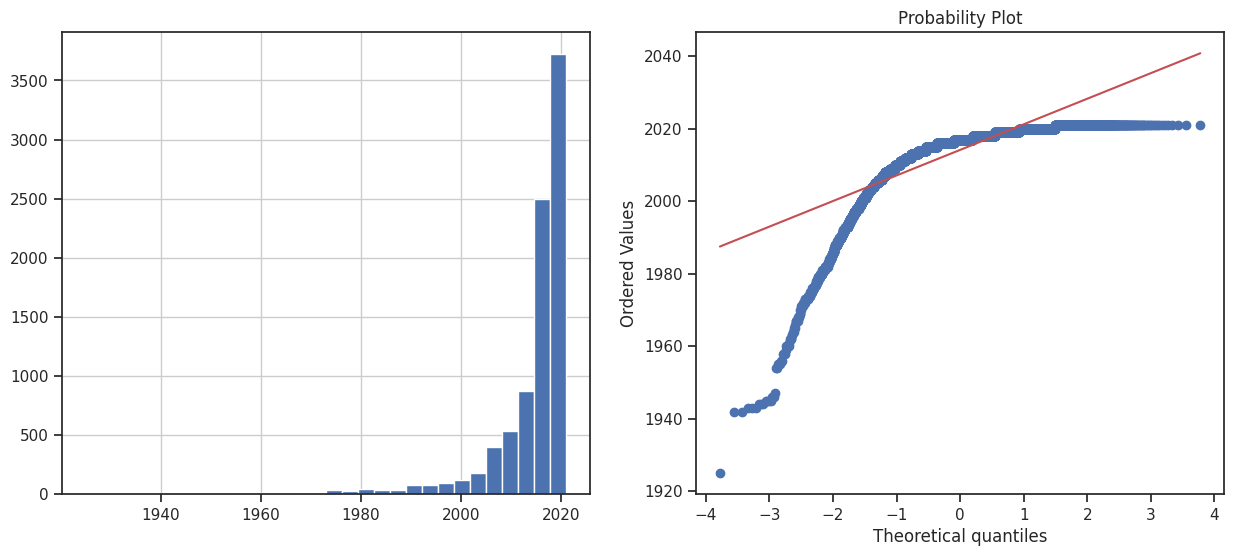

In [ ]:
diagnostic_plots(data, 'release_year')

### Логарифмическое преобразование

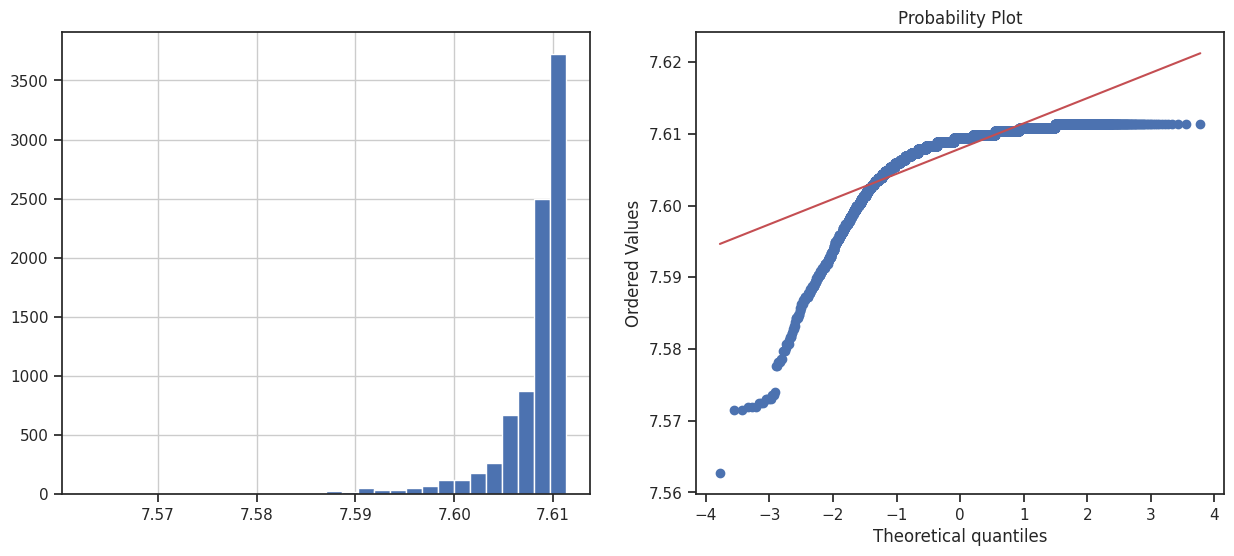

In [ ]:
data['release_year_log'] = np.log(data['release_year'])
diagnostic_plots(data, 'release_year_log')

### Обратное преобразование

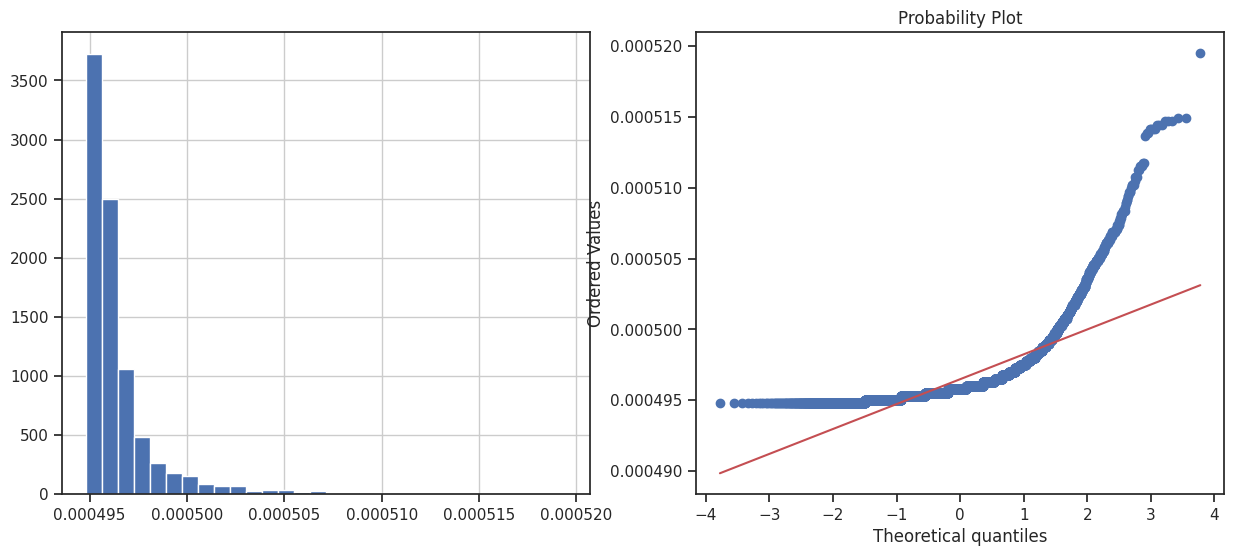

In [ ]:
data['release_year_reciprocal'] = 1 / (data['release_year'])
diagnostic_plots(data, 'release_year_reciprocal')

### Преобразование с использованием квадратного корня

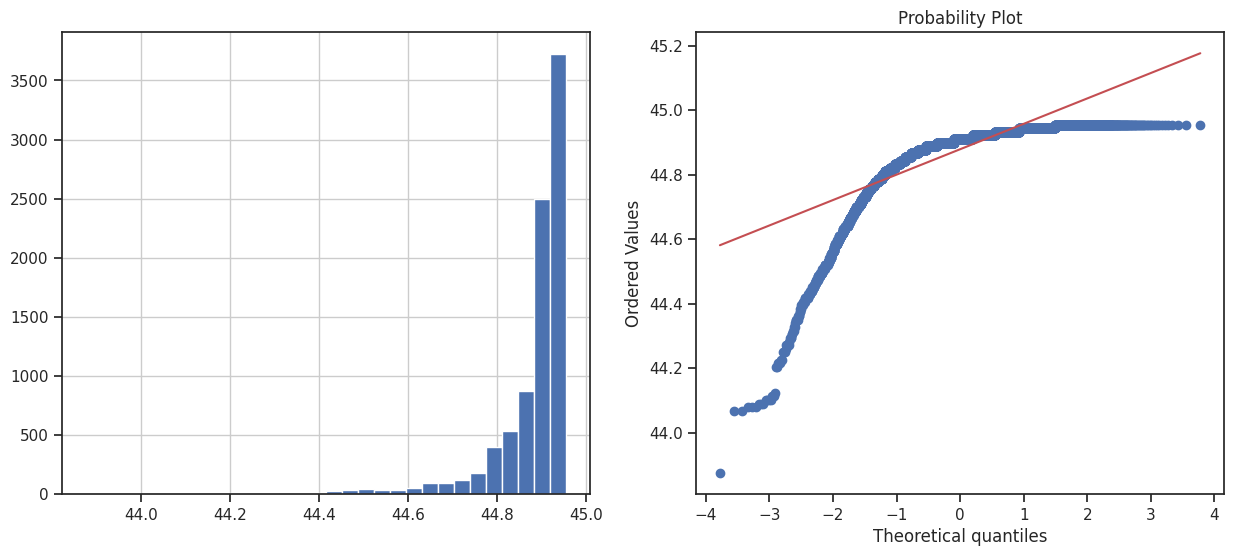

In [ ]:
data['release_year_sqr'] = data['release_year']**(1/2)
diagnostic_plots(data, 'release_year_sqr')

### Возведение в степень

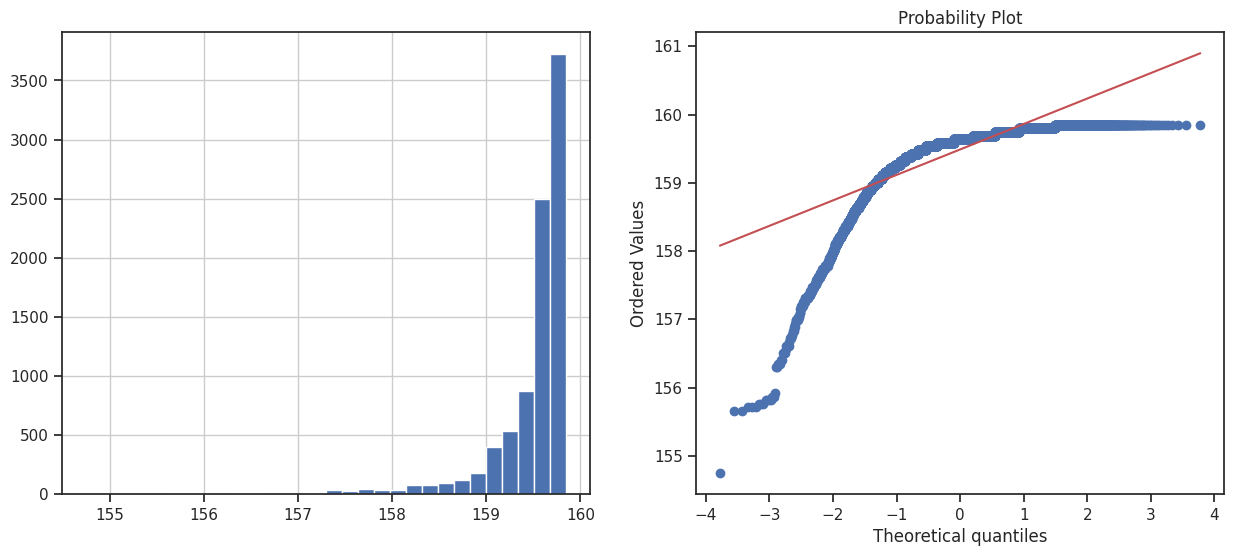

In [ ]:
data['release_year_exp'] = data['release_year']**(1/1.5)
diagnostic_plots(data, 'release_year_exp')

### Преобразование Бокса-Кокса

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Оптимальное значение λ = 46.79897643237659


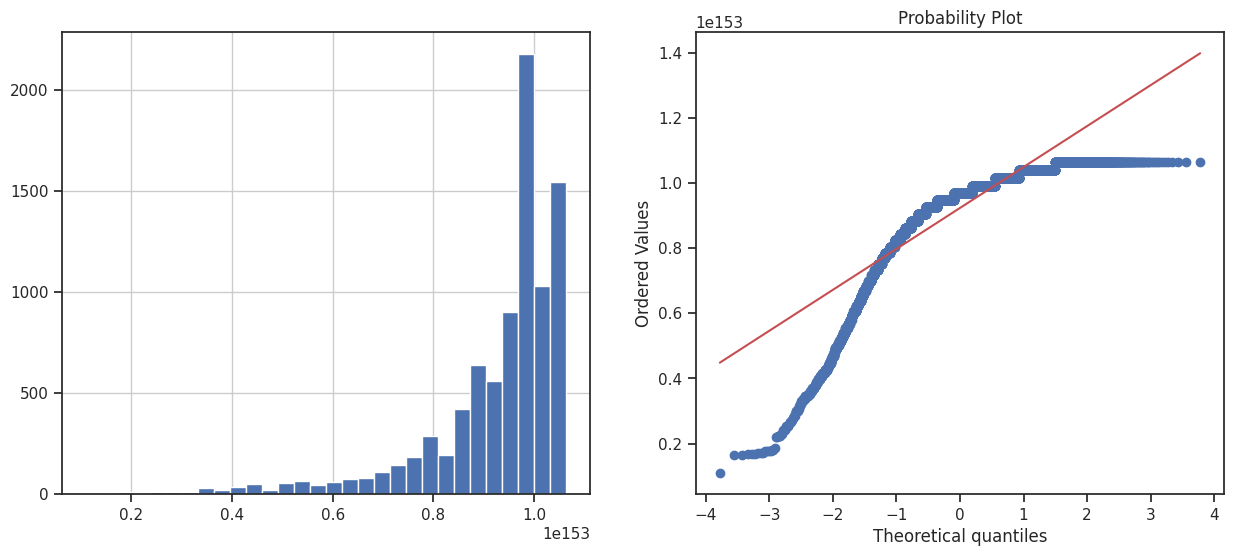

In [ ]:
data['release_year_cox'], param = stats.boxcox(data['release_year'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'release_year_cox')

### Преобразование Йео-Джонсона

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Оптимальное значение λ = 46.795973629169694


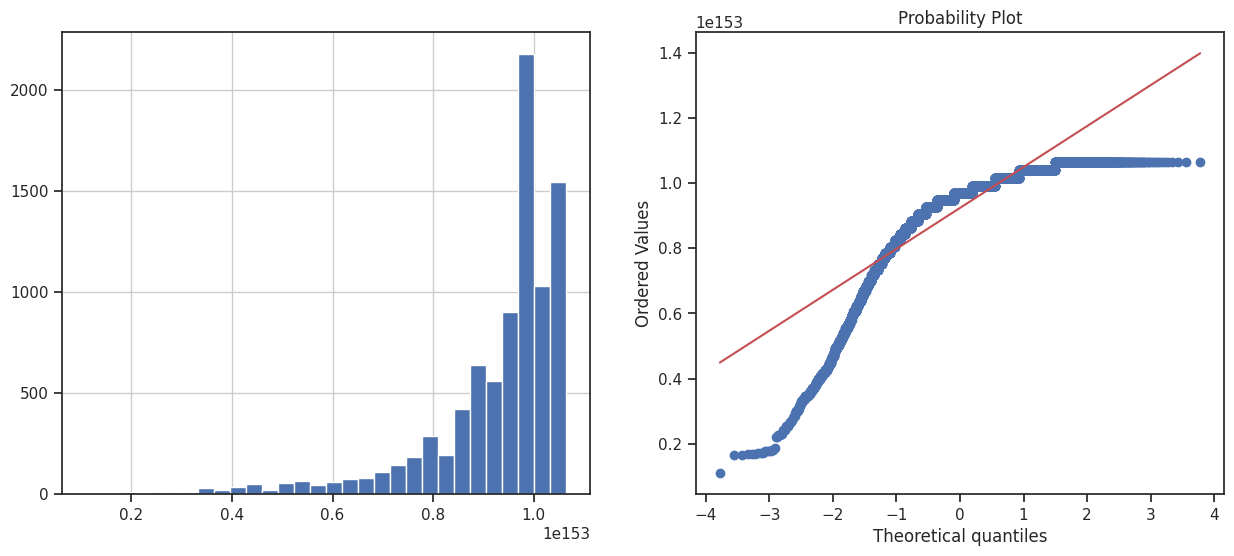

In [ ]:
# Необходимо преобразовать данные к действительному типу
data['release_year'] = data['release_year'].astype('float')
data['release_year_yeojohnson'], param = stats.yeojohnson(data['release_year'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'release_year_yeojohnson')